<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·第五次作业·聚类算法

#### 纪泽西 17375338

#### Last Modified:10th,April,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/KNN%26Feature_Extraction.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part1: Kmeans

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from keras.utils import plot_model

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from time import *
import pandas as pd

import os
import scipy.io as sio
from IPython.display import Image


In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))
n_clusters = len(np.unique(y_test))

In [0]:
kmeans = KMeans(n_clusters=n_clusters+2,n_init=15,n_jobs=4)

由于数据集中1的书写方式有印刷体和手写体两种，且差距过大导致聚类将其分为两类，考虑增加聚类个数，之后手动整合

In [21]:
# 考虑直接在测试集上聚类
st=time()
y_hat = kmeans.fit_predict(x_test)
et=time()
print("amount time: {:.4f} s".format(et-st))

amount time: 34.7223 s


In [30]:
# 考虑在训练集上聚类，利用聚类结果分析数据集
kmeans1 = KMeans(n_clusters=n_clusters+2,n_init=15,n_jobs=4)
st=time()
kmeans1.fit(x_train)
y_hat2 = kmeans1.predict(x_test)
et=time()
print("amount time: {:.4f} s".format(et-st))

amount time: 339.9332 s


In [0]:
# 可视化结果并展示分类准确性
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")


### 第一组测试

Sum Axis-1 as Classification accuracy: 0.1105


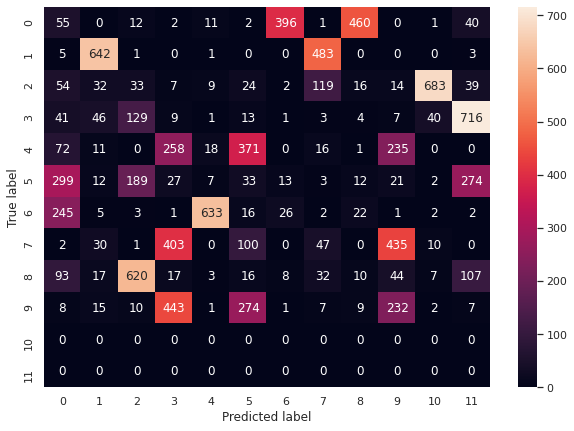

In [23]:
draw_confusionmatrix(y_test,y_hat)

手动对聚类标签进行修正，依据<对应标签真实值最大>的原则进行修正

In [0]:
temp=[5,1,8,9,6,4,0,1,0,7,2,3]
y_hat1=np.zeros(10000)
for i in range(0,10000):
  y_hat1[i] = temp[y_hat[i]]

Sum Axis-1 as Classification accuracy: 0.6181


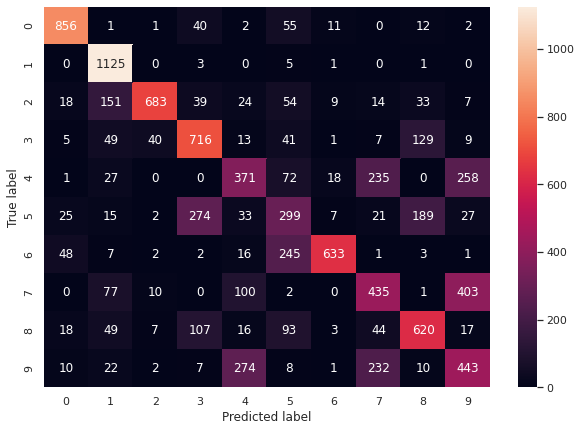

In [28]:
draw_confusionmatrix(y_test,y_hat1)

### 第二组测试

Sum Axis-1 as Classification accuracy: 0.0165


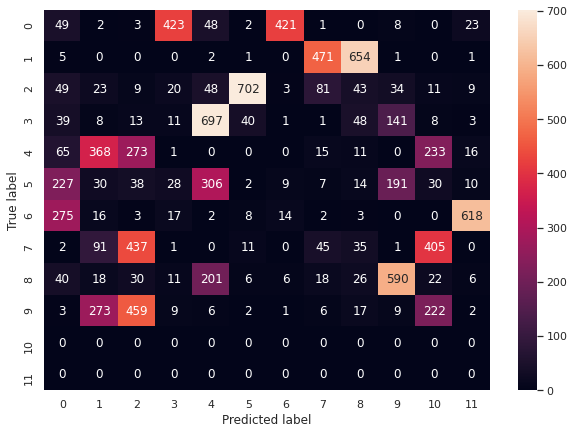

In [31]:
draw_confusionmatrix(y_test,y_hat2)

In [0]:
temp=[5,4,9,0,3,2,0,1,1,8,7,6]
y_hat3=np.zeros(10000)
for i in range(0,10000):
  y_hat3[i] = temp[y_hat2[i]]

Sum Axis-1 as Classification accuracy: 0.6035


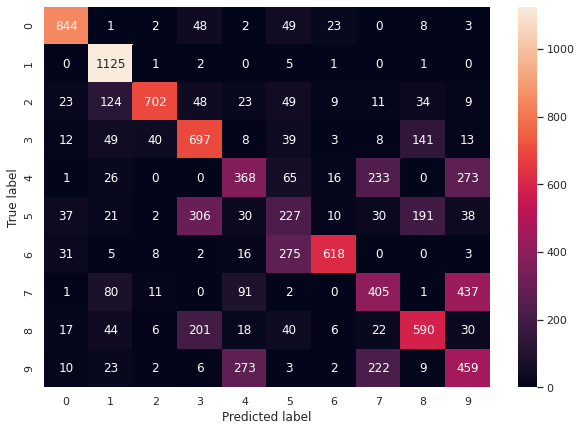

In [33]:
draw_confusionmatrix(y_test,y_hat3)

### 通过上述两种测试发现:
- 直接对测试集分类或先对训练集训练聚类中心后分类效果相近；
- 由于维数过多，且为无监督学习，当前聚类效果并不好，可以考虑使用AutoEncoder等方法预处理数据降低数据维数后进行聚类。
